In [2]:
#Import PySpark library

import findspark
findspark.init('/home/user/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [3]:
#Import dataset

drugdata = spark.read.csv('drugdata_names_dirtied.csv',header=True,inferSchema=True)

# View data.

drugdata.show()

+---+-----+------+-------------------+---------+-----------+-----------+------------+----------------------+-------------+-----------------+-------------+-----------------+-------+-----------+------------+------+--------+--------+---------+-------+-----+-------+------+--------+-----------+---+----+---------+--------+-------+--------+
| ID|  Age|Gender|          Education|  Country|  Ethnicity|Neuroticism|Extraversion|Openness to experience|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|Alcohol|Amphetamine|Amyl nitrate|Benzos|Caffeine|Cannabis|Chocolate|Cocaine|Crack|Ecstacy|Heroin|Ketamine|Legal highs|LSD|Meth|Mushrooms|Nicotine|Semeron|Volatile|
+---+-----+------+-------------------+---------+-----------+-----------+------------+----------------------+-------------+-----------------+-------------+-----------------+-------+-----------+------------+------+--------+--------+---------+-------+-----+-------+------+--------+-----------+---+----+---------+--------+-------+--

In [4]:
# View information about the data.

drugdata.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Ethnicity: string (nullable = true)
 |-- Neuroticism: integer (nullable = true)
 |-- Extraversion: integer (nullable = true)
 |-- Openness to experience: integer (nullable = true)
 |-- Agreeableness: integer (nullable = true)
 |-- Conscientiousness: integer (nullable = true)
 |-- Impulsiveness: double (nullable = true)
 |-- Sensation seeking: double (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Amphetamine: string (nullable = true)
 |-- Amyl nitrate: string (nullable = true)
 |-- Benzos: string (nullable = true)
 |-- Caffeine: string (nullable = true)
 |-- Cannabis: string (nullable = true)
 |-- Chocolate: string (nullable = true)
 |-- Cocaine: string (nullable = true)
 |-- Crack: string (nullable = true)
 |-- Ecstacy: string (nullable = true)
 |-- Heroin: string (nullable = 

In [5]:
# View counts, average values, minimums, maximums, standard deviation. Because most of my columns are strings, 
# this isn't as useful as it would be for some data types, but there is some useful information.

drugdata.describe().show()

+-------+-----------------+-----+------+-------------------+---------+-----------+-----------------+-----------------+----------------------+-----------------+-----------------+--------------------+--------------------+-------+-----------+------------+------+--------+--------+---------+-------+-----+-------+------+--------+-----------+----+----+---------+--------+-------+--------+
|summary|               ID|  Age|Gender|          Education|  Country|  Ethnicity|      Neuroticism|     Extraversion|Openness to experience|    Agreeableness|Conscientiousness|       Impulsiveness|   Sensation seeking|Alcohol|Amphetamine|Amyl nitrate|Benzos|Caffeine|Cannabis|Chocolate|Cocaine|Crack|Ecstacy|Heroin|Ketamine|Legal highs| LSD|Meth|Mushrooms|Nicotine|Semeron|Volatile|
+-------+-----------------+-----+------+-------------------+---------+-----------+-----------------+-----------------+----------------------+-----------------+-----------------+--------------------+--------------------+-------+-----

In [6]:
# We could just look at the numerical data to make it easier to read. I've done two separate tables because
# it's too wide otherwise, and becomes hard to read.

drugdata.select('Neuroticism','Extraversion','Openness to experience','Conscientiousness').describe().show()
drugdata.select('Agreeableness','Impulsiveness','Sensation seeking').describe().show()

+-------+-----------------+-----------------+----------------------+-----------------+
|summary|      Neuroticism|     Extraversion|Openness to experience|Conscientiousness|
+-------+-----------------+-----------------+----------------------+-----------------+
|  count|             1885|             1885|                  1885|             1885|
|   mean|35.92148541114059|39.57612732095491|    45.762334217506634|41.43713527851459|
| stddev| 9.13586931801127| 6.77176939880375|    6.5796413521926596| 6.96662503659267|
|    min|               12|               16|                    24|               17|
|    max|               60|               59|                    60|               59|
+-------+-----------------+-----------------+----------------------+-----------------+

+-------+-----------------+--------------------+--------------------+
|summary|    Agreeableness|       Impulsiveness|   Sensation seeking|
+-------+-----------------+--------------------+--------------------+
|  cou

In [7]:
# It would be a good idea to explore the data in greate'r depth. A quick look at the table suggested that some
# attributes had a particular value that was highly overrepresented. Let's see.

drugdata.groupBy('Age').count().orderBy('Age').show()
drugdata.groupBy('Gender').count().orderBy('Gender').show()
drugdata.groupBy('Education').count().orderBy('Education').show()
drugdata.groupBy('Country').count().orderBy('Country').show()
drugdata.groupBy('Ethnicity').count().orderBy('Ethnicity').show()

+-----+-----+
|  Age|count|
+-----+-----+
| null|    1|
|18-24|  643|
|25-34|  481|
|35-44|  356|
|45-54|  294|
|55-64|   92|
|  65+|   18|
+-----+-----+

+------+-----+
|Gender|count|
+------+-----+
|  null|    2|
|Female|  942|
|  Male|  941|
+------+-----+

+--------------------+-----+
|           Education|count|
+--------------------+-----+
| Certificate/diploma|  270|
|    Doctorate degree|   89|
|   Left school at 16|   99|
|   Left school at 17|   30|
|   Left school at 18|  100|
|Left school befor...|   28|
|      Masters degree|  283|
|        Some college|  506|
|   University degree|  480|
+--------------------+-----+

+-----------+-----+
|    Country|count|
+-----------+-----+
|  Australia|   54|
|     Canada|   87|
|    Ireland|   20|
|New Zealand|    5|
|      Other|  118|
|         UK| 1044|
|        USA|  557|
+-----------+-----+

+-----------+-----+
|  Ethnicity|count|
+-----------+-----+
|       null|    1|
|      Asian|   26|
|      Black|   33|
|Black/Asian|    3|


In [8]:
# Several columns have a count less than the total number of rows, indicating that there are missing values.
# I can see how many values are missing by getting a row count for the original dataset, then dropping all rows with
# missing values and getting a row count for the resulting table.

print("Total data points:", drugdata.count())
dropped_data = drugdata.na.drop()
print("Total data points:", dropped_data.count())

Total data points: 1885
Total data points: 1876


In [9]:
# There are 9 rows containing missing values. How I respond to these missing values will depend on the data type.
# First I check whether any numerical values are missing.

missing_field_data = drugdata.na.drop(subset="Neuroticism")
print("Total data points (Neuroticism):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Extraversion")
print("Total data points (Extraversion):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Openness to experience")
print("Total data points (Openness to experience):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Agreeableness")
print("Total data points (Agreeableness):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Conscientiousness")
print("Total data points (Conscientiousness):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Impulsiveness")
print("Total data points (Impulsiveness):", missing_field_data.count())

missing_field_data = drugdata.na.drop(subset="Sensation seeking")
print("Total data points (Sensation seeking):", missing_field_data.count())

Total data points (Neuroticism): 1885
Total data points (Extraversion): 1885
Total data points (Openness to experience): 1885
Total data points (Agreeableness): 1884
Total data points (Conscientiousness): 1885
Total data points (Impulsiveness): 1885
Total data points (Sensation seeking): 1885


In [10]:
# Only Agreeableness is missing a value, so I'll only work on that column for now.
# I replace the missing value in Agreeableness with the mean value of the column.

# Import necessary function
from pyspark.sql.functions import mean

# Extract mean value
mean_agreeableness = drugdata.select(mean('Agreeableness')).collect()
mean_agreeableness = mean_agreeableness[0]
mean_agreeableness = mean_agreeableness[0]

# Print mean value for checking purposes
print(mean_agreeableness)

# Replace missing value with mean value
drugdata = drugdata.na.fill(mean_agreeableness, subset=['Agreeableness'])

# Test that there are now no missing values
missing_field_data = drugdata.na.drop(subset="Agreeableness")
print("Total data points (Agreeableness):", missing_field_data.count())

42.86518046709129
Total data points (Agreeableness): 1885


In [11]:
# Because drug use is the focus of this data mining task, records that are missing drug use information are seriously
# compromised in terms of usefulness and can be deleted.

drugdata = drugdata.na.drop(subset='Alcohol')
drugdata = drugdata.na.drop(subset='Amphetamine')
drugdata = drugdata.na.drop(subset='Amyl nitrate')
drugdata = drugdata.na.drop(subset='Benzos')
drugdata = drugdata.na.drop(subset='Caffeine')
drugdata = drugdata.na.drop(subset='Cannabis')
drugdata = drugdata.na.drop(subset='Chocolate')
drugdata = drugdata.na.drop(subset='Cocaine')
drugdata = drugdata.na.drop(subset='Crack')
drugdata = drugdata.na.drop(subset='Ecstacy')
drugdata = drugdata.na.drop(subset='Heroin')
drugdata = drugdata.na.drop(subset='Ketamine')
drugdata = drugdata.na.drop(subset='Legal highs')
drugdata = drugdata.na.drop(subset='LSD')
drugdata = drugdata.na.drop(subset='Meth')
drugdata = drugdata.na.drop(subset='Mushrooms')
drugdata = drugdata.na.drop(subset='Nicotine')
drugdata = drugdata.na.drop(subset='Semeron')
drugdata = drugdata.na.drop(subset='Volatile')
print("Total data points:", drugdata.count())

Total data points: 1881


In [12]:
# We still have missing values, but they are not worth deleting entire records over.

# We know any remaining missing values are in one of the first few columns, so we can just replace any missing values
# in those columns.
drugdata = drugdata.na.fill('Unknown', subset=['Age','Gender','Education','Country','Ethnicity'])

# We can return a count to make sure there are no more missing values.
print("Total data points:", drugdata.na.drop().count())

Total data points: 1881


In [13]:
# Even though there are no more missing values, more can be done to enhance the quality of this dataset.

# Semeron is a fictitious drug, so any respondent who claims to have used Semeron is unreliable. 
# We can filter these records out.
drugdata = drugdata.filter("Semeron = 'CL0'")

print("Total data points:", drugdata.count())

Total data points: 1873


In [14]:
# We don't want every column. Semeron is now redundant, and caffeine and chocolate are not very useful either.

drugdata = drugdata.select('Age','Gender','Education','Country','Ethnicity',
                           'Neuroticism','Extraversion','Openness to experience',
                           'Agreeableness','Conscientiousness','Impulsiveness',
                           'Sensation seeking','Alcohol','Amphetamine','Amyl nitrate',
                           'Benzos','Cannabis','Cocaine','Crack','Ecstacy','Heroin',
                           'Ketamine','Legal highs','LSD','Meth','Mushrooms','Nicotine','Volatile')
drugdata.show()

+-----+------+-------------------+---------+-----------+-----------+------------+----------------------+-------------+-----------------+-------------+-----------------+-------+-----------+------------+------+--------+-------+-----+-------+------+--------+-----------+---+----+---------+--------+--------+
|  Age|Gender|          Education|  Country|  Ethnicity|Neuroticism|Extraversion|Openness to experience|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|Alcohol|Amphetamine|Amyl nitrate|Benzos|Cannabis|Cocaine|Crack|Ecstacy|Heroin|Ketamine|Legal highs|LSD|Meth|Mushrooms|Nicotine|Volatile|
+-----+------+-------------------+---------+-----------+-----------+------------+----------------------+-------------+-----------------+-------------+-----------------+-------+-----------+------------+------+--------+-------+-----+-------+------+--------+-----------+---+----+---------+--------+--------+
|35-44|Female|Certificate/diploma|       UK|White/Asian|         39|          36|    

In [15]:
# Let's look at the distribution of personality traits by drug use status for some of our target drugs.

from pyspark.sql.functions import format_number, col


# Personality data by heroin use status.
heroin_stats = drugdata.groupBy('Heroin').mean()
heroin_stats = heroin_stats.select('Heroin',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
heroin_stats = heroin_stats.select('Heroin',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
heroin_stats.orderBy('Heroin').show()

+------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Heroin|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|   CL0|      35.26|       39.80|      45.31|        43.27|            41.93|        -0.07|            -0.09|
|   CL1|      38.26|       37.72|      47.28|        42.13|            39.01|         0.17|             0.19|
|   CL2|      39.16|       39.00|      49.32|        41.08|            38.87|         0.52|             0.53|
|   CL3|      39.97|       39.11|      48.59|        40.42|            39.42|         0.49|             0.54|
|   CL4|      39.88|       37.25|      47.46|        38.38|            37.08|         0.72|             0.85|
|   CL5|      42.44|       37.06|      47.31|        37.81|            36.12|         0.79|             0.73|
|   CL6|  

In [16]:
# We can see that some traits seem to correlate with heroin use. Let's visualize them.

drugdata.toPandas().boxplot(column='Neuroticism', by = 'Heroin')
drugdata.toPandas().boxplot(column='Agreeableness', by = 'Heroin')
drugdata.toPandas().boxplot(column='Sensation seeking', by = 'Heroin')

In [17]:
# Personality data by cocaine use status.
cocaine_stats = drugdata.groupBy('Cocaine').mean()
cocaine_stats = cocaine_stats.select('Cocaine',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
cocaine_stats = cocaine_stats.select('Cocaine',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
cocaine_stats.orderBy('Cocaine').show()

+-------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Cocaine|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+-------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|    CL0|      34.84|       39.69|      44.52|        43.88|            42.69|        -0.20|            -0.26|
|    CL1|      35.98|       38.01|      46.40|        42.69|            41.11|        -0.00|            -0.17|
|    CL2|      36.97|       39.11|      47.23|        42.23|            40.29|         0.18|             0.22|
|    CL3|      37.49|       40.03|      47.74|        41.29|            39.05|         0.40|             0.48|
|    CL4|      38.42|       40.15|      47.88|        40.78|            39.59|         0.45|             0.58|
|    CL5|      38.45|       41.33|      47.17|        39.50|            38.02|         0.52|             0.69|
|

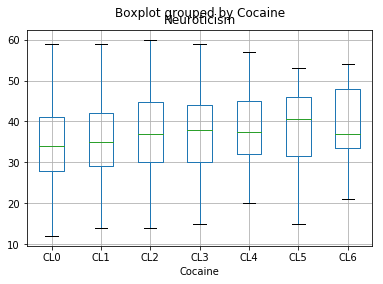

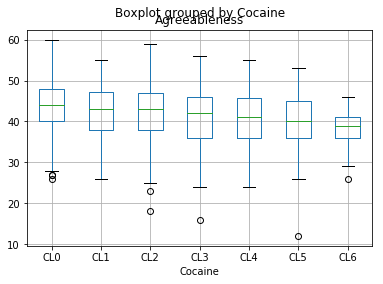

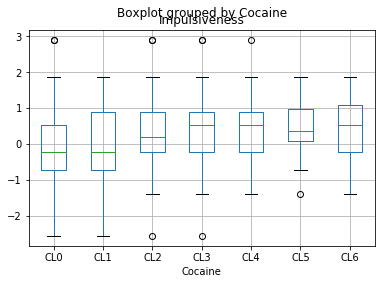

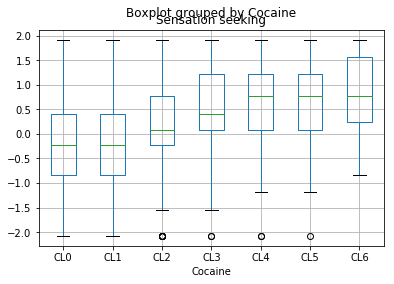

In [18]:
# Again, some traits seem to correlate with cocaine use status. It will be interesting to visualize them.

drugdata.toPandas().boxplot(column='Neuroticism', by = 'Cocaine')
drugdata.toPandas().boxplot(column='Agreeableness', by = 'Cocaine')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Cocaine')
drugdata.toPandas().boxplot(column='Sensation seeking', by = 'Cocaine')

In [19]:
# Personality data by cannabis use status.
cannabis_stats = drugdata.groupBy('Cannabis').mean()
cannabis_stats = cannabis_stats.select('Cannabis',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
cannabis_stats = cannabis_stats.select('Cannabis',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
cannabis_stats.orderBy('Cannabis').show()

+--------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Cannabis|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+--------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|     CL0|      34.16|       40.23|      41.89|        44.61|            44.62|        -0.45|            -0.65|
|     CL1|      33.72|       39.58|      43.53|        44.06|            43.28|        -0.29|            -0.39|
|     CL2|      36.59|       39.26|      44.41|        42.22|            42.08|        -0.04|            -0.21|
|     CL3|      38.26|       38.55|      46.55|        42.28|            39.67|         0.12|             0.20|
|     CL4|      37.07|       39.28|      47.64|        41.75|            39.03|         0.38|             0.43|
|     CL5|      36.51|       39.68|      48.60|        42.78|            39.86|         0.25|           

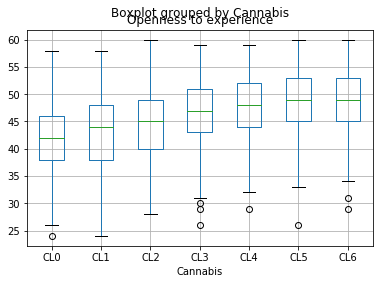

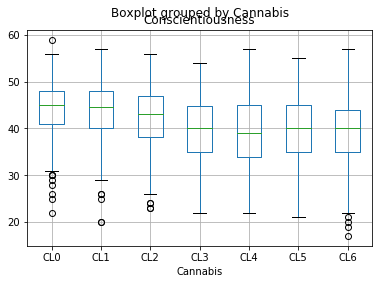

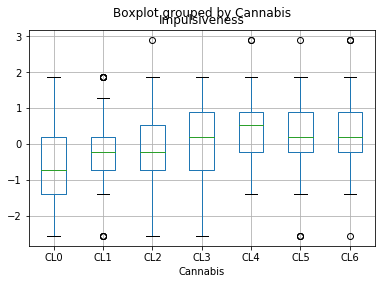

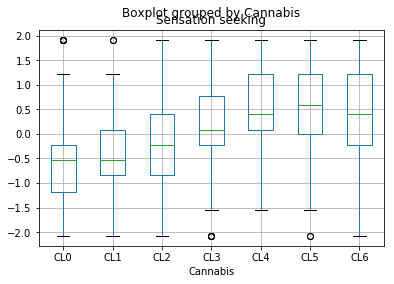

In [20]:
# Visualize certain correlations by cannabis use status

drugdata.toPandas().boxplot(column='Openness to experience', by = 'Cannabis')
drugdata.toPandas().boxplot(column='Conscientiousness', by = 'Cannabis')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Cannabis')
drugdata.toPandas().boxplot(column='Sensation seeking', by = 'Cannabis')

In [21]:
# Personality data by meth use status.
meth_stats = drugdata.groupBy('Meth').mean()
meth_stats = meth_stats.select('Meth',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
meth_stats = meth_stats.select('Meth',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
meth_stats.orderBy('Meth').show()

+----+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Meth|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+----+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
| CL0|      34.95|       40.00|      44.97|        43.44|            42.25|        -0.10|            -0.14|
| CL1|      37.82|       38.62|      47.10|        41.67|            39.90|         0.22|             0.11|
| CL2|      37.84|       38.69|      48.41|        42.33|            39.28|         0.32|             0.31|
| CL3|      38.61|       38.65|      48.96|        40.89|            39.10|         0.35|             0.45|
| CL4|      39.04|       40.06|      49.28|        40.70|            37.76|         0.45|             0.69|
| CL5|      39.40|       36.75|      48.21|        39.71|            37.77|         0.45|             0.56|
| CL6|      41.19|       36.

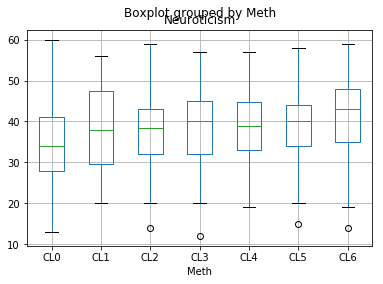

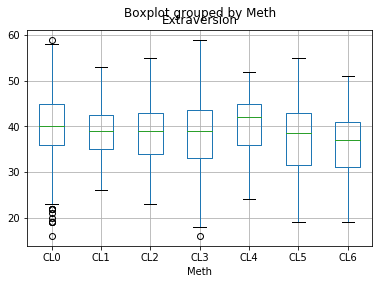

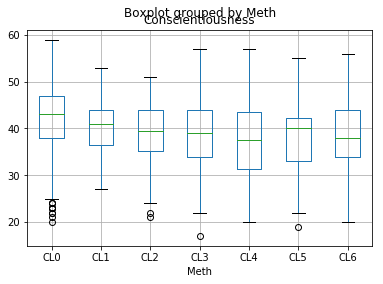

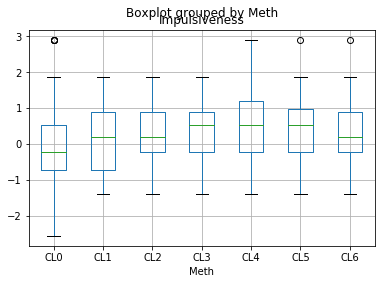

In [22]:
drugdata.toPandas().boxplot(column='Neuroticism', by = 'Meth')
drugdata.toPandas().boxplot(column='Extraversion', by = 'Meth')
drugdata.toPandas().boxplot(column='Conscientiousness', by = 'Meth')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Meth')

In [23]:
# Personality data by nicotine use status.
nicotine_stats = drugdata.groupBy('Nicotine').mean()
nicotine_stats = nicotine_stats.select('Nicotine',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
nicotine_stats = nicotine_stats.select('Nicotine',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
nicotine_stats.orderBy('Nicotine').show()

+--------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Nicotine|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+--------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|     CL0|      34.38|       40.00|      43.74|        44.19|            43.46|        -0.34|            -0.46|
|     CL1|      33.93|       39.06|      43.97|        43.40|            43.45|        -0.15|            -0.31|
|     CL2|      35.55|       39.96|      45.22|        42.86|            42.71|        -0.10|            -0.15|
|     CL3|      37.19|       38.85|      47.19|        42.34|            41.06|         0.04|             0.25|
|     CL4|      35.71|       39.73|      48.32|        42.01|            39.64|         0.18|             0.30|
|     CL5|      36.31|       40.69|      47.57|        42.33|            40.27|         0.15|           

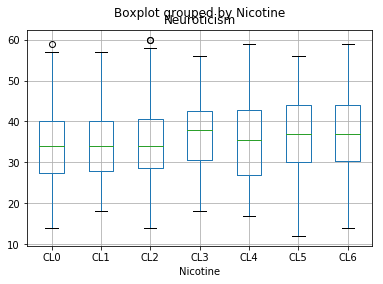

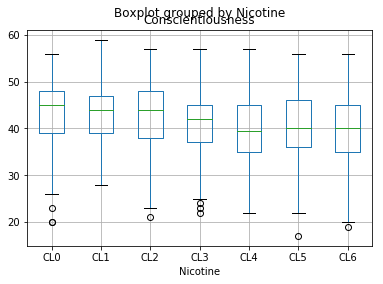

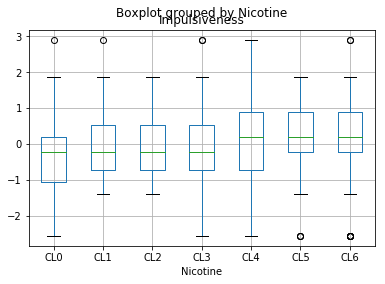

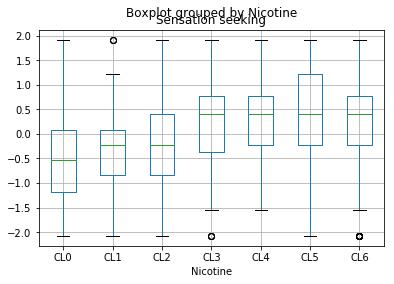

In [24]:
drugdata.toPandas().boxplot(column='Neuroticism', by = 'Nicotine')
drugdata.toPandas().boxplot(column='Conscientiousness', by = 'Nicotine')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Nicotine')
drugdata.toPandas().boxplot(column='Sensation seeking', by = 'Nicotine')

In [25]:
# Personality data by benzodiazepine use status.
benzo_stats = drugdata.groupBy('Benzos').mean()
benzo_stats = benzo_stats.select('Benzos',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
benzo_stats = benzo_stats.select('Benzos',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
benzo_stats.orderBy('Benzos').show()

+------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Benzos|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|   CL0|      33.93|       40.14|      44.43|        43.74|            42.75|        -0.18|            -0.20|
|   CL1|      36.19|       39.01|      45.58|        42.74|            41.14|         0.04|            -0.21|
|   CL2|      36.53|       39.07|      46.96|        42.85|            40.69|         0.06|             0.02|
|   CL3|      37.42|       39.59|      47.98|        41.98|            39.89|         0.23|             0.35|
|   CL4|      39.08|       40.13|      48.03|        40.80|            39.25|         0.42|             0.53|
|   CL5|      40.75|       36.86|      46.99|        41.23|            38.39|         0.49|             0.39|
|   CL6|  

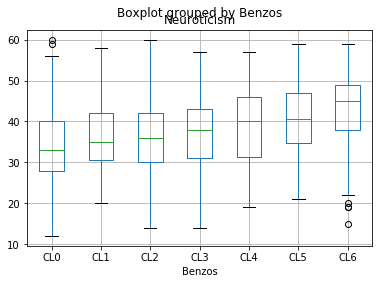

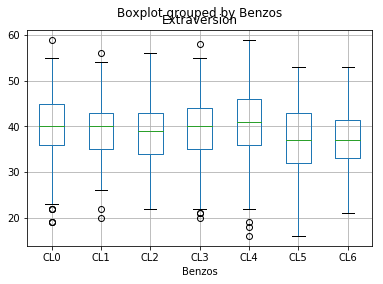

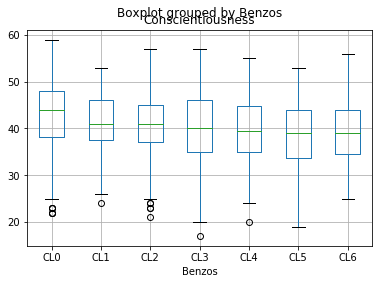

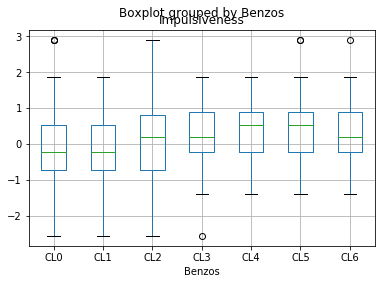

In [26]:
drugdata.toPandas().boxplot(column='Neuroticism', by = 'Benzos')
drugdata.toPandas().boxplot(column='Extraversion', by = 'Benzos')
drugdata.toPandas().boxplot(column='Conscientiousness', by = 'Benzos')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Benzos')

In [27]:
# Personality data by amphetamine use status.
amphetamine_stats = drugdata.groupBy('Amphetamine').mean()
amphetamine_stats = amphetamine_stats.select('Amphetamine',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
amphetamine_stats = amphetamine_stats.select('Amphetamine',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
amphetamine_stats.orderBy('Amphetamine').show()

+-----------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|Amphetamine|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+-----------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
|        CL0|      34.96|       39.88|      44.22|        43.68|            42.82|        -0.23|            -0.30|
|        CL1|      35.45|       39.01|      46.24|        42.47|            41.81|        -0.00|            -0.09|
|        CL2|      36.21|       39.56|      46.88|        42.92|            40.69|         0.11|             0.26|
|        CL3|      37.66|       39.47|      48.94|        41.97|            39.29|         0.40|             0.59|
|        CL4|      38.39|       39.74|      47.82|        40.39|            37.59|         0.50|             0.72|
|        CL5|      38.93|       39.27|      49.22|        41.08|            37.8

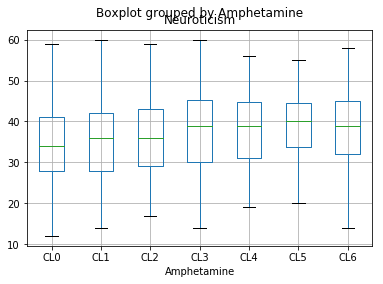

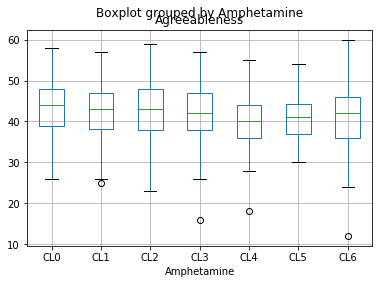

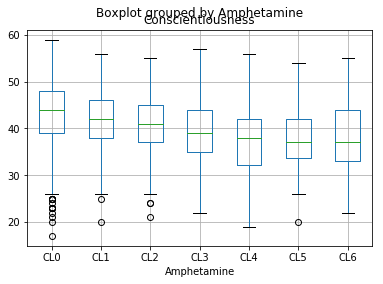

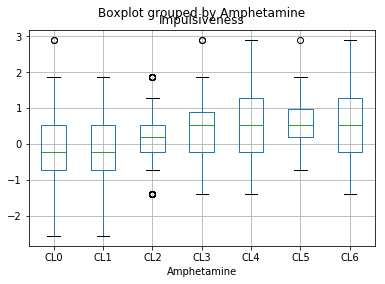

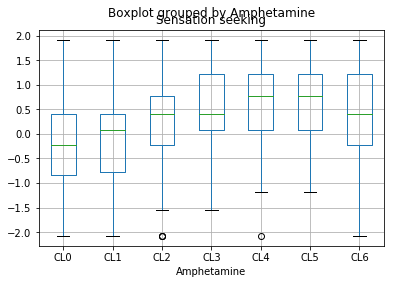

In [28]:
drugdata.toPandas().boxplot(column='Neuroticism', by = 'Amphetamine')
drugdata.toPandas().boxplot(column='Agreeableness', by = 'Amphetamine')
drugdata.toPandas().boxplot(column='Conscientiousness', by = 'Amphetamine')
drugdata.toPandas().boxplot(column='Impulsiveness', by = 'Amphetamine')
drugdata.toPandas().boxplot(column='Sensation seeking', by = 'Amphetamine')

In [29]:
# That is some interesting preliminary information. Now to do some machine learning.

# Import relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.classification import LogisticRegression

In [30]:
# Reduce dimensionality of table. We've already got rid of some of the truly irrelevant information,
# but there's also good reason to doubt the predictive power of Ethnicity and Country, given their distribution.
# We can also get rid of a few more drugs that seem to be less relevant.

drugdata = drugdata.select('Age','Gender','Education','Neuroticism','Extraversion','Openness to experience','Agreeableness',
                           'Conscientiousness','Impulsiveness','Sensation seeking','Alcohol','Amphetamine','Benzos',
                           'Cannabis','Cocaine','Crack','Ecstacy','Heroin','Meth','Nicotine')

drugdata.printSchema()

root
 |-- Age: string (nullable = false)
 |-- Gender: string (nullable = false)
 |-- Education: string (nullable = false)
 |-- Neuroticism: integer (nullable = true)
 |-- Extraversion: integer (nullable = true)
 |-- Openness to experience: integer (nullable = true)
 |-- Agreeableness: integer (nullable = true)
 |-- Conscientiousness: integer (nullable = true)
 |-- Impulsiveness: double (nullable = true)
 |-- Sensation seeking: double (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Amphetamine: string (nullable = true)
 |-- Benzos: string (nullable = true)
 |-- Cannabis: string (nullable = true)
 |-- Cocaine: string (nullable = true)
 |-- Crack: string (nullable = true)
 |-- Ecstacy: string (nullable = true)
 |-- Heroin: string (nullable = true)
 |-- Meth: string (nullable = true)
 |-- Nicotine: string (nullable = true)



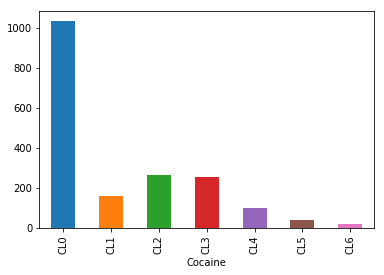

In [31]:
# My first target variable is cocaine. I want to get some idea of class distribution.

drugdata.toPandas().groupby('Cocaine').size().plot(kind='bar')

In [32]:
# I'll use cocaine as my target variable. I want to do binomial regression, so I need to make it into a binary feature.
cocaine_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Cocaine')
cocaine_dataset = cocaine_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Cocaine')

# Let's make sure it worked.
cocaine_dataset.select('Cocaine').show()

+--------+
| Cocaine|
+--------+
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
+--------+
only showing top 20 rows



In [33]:
# Much of the information is in string form, so we need to convert it in order to work with it.
# Code adapted from tutorial examples.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# I'll use cocaine as my target feature for this iteration, so its output is given the label 'label'.
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='label')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                      'cannabisVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec','Neuroticism',
                                      'Extraversion','Openness to experience','Agreeableness','Conscientiousness',
                                      'Impulsiveness','Sensation seeking'], outputCol="features")

In [34]:
# Now that everything has been set up, I'll set up a pipeline to call the indexer, encoder and assembler.
# Code adapted from tutorial examples.

from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(cocaine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(cocaine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [35]:
# Split data and train a logistic regression model, then test on the testing set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1302
Test Dataset Count: 571


True Positives: 69
True Negatives: 412
False Positives: 34
False Negatives: 56
Total: 571


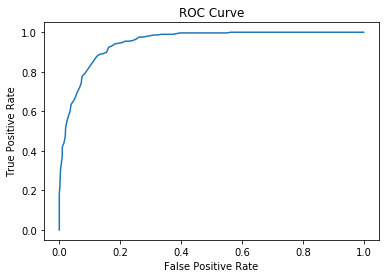

Area Under the Curve: 0.948078474451177


In [36]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

Recall: 0.552
Precision: 0.6699029126213593


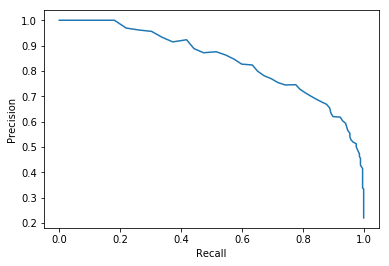

In [37]:
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Show precision & recall.

r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

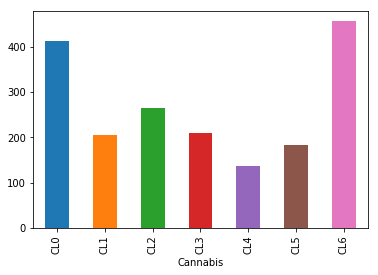

In [38]:
# I'll repeat the above modelling for other target variables.

drugdata.toPandas().groupby('Cannabis').size().plot(kind='bar')

In [39]:
# I go through the process of preparing the dataset again, this time using cannabis as my target variable.
cannabis_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Cannabis')
cannabis_dataset = cannabis_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Cannabis')

cannabis_dataset.select('Cannabis').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='label')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                      'cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec','Neuroticism',
                                      'Extraversion','Openness to experience','Agreeableness','Conscientiousness',
                                      'Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(cannabis_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(cannabis_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+--------+
|Cannabis|
+--------+
|Non-user|
|    User|
|    User|
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|    User|
|    User|
|Non-user|
|Non-user|
|Non-user|
|    User|
|    User|
|    User|
|Non-user|
+--------+
only showing top 20 rows



In [40]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1350
Test Dataset Count: 523


True Positives: 217
True Negatives: 239
False Positives: 27
False Negatives: 40
Total: 523


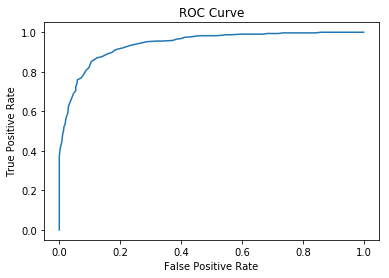

Area Under the Curve: 0.9403527886091355
Recall: 0.8443579766536965
Precision: 0.889344262295082


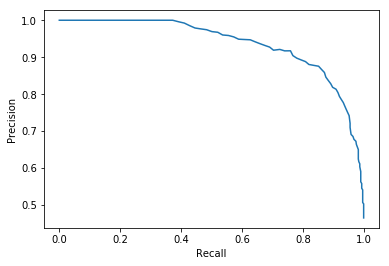

In [41]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

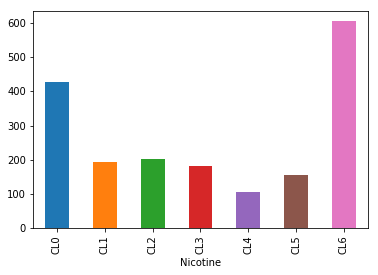

In [42]:
# Repeat for other target variables.

drugdata.toPandas().groupby('Nicotine').size().plot(kind='bar')

In [43]:
# I go through the process of preparing the dataset again, this time using nicotine as my target variable.
nicotine_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Nicotine')
nicotine_dataset = nicotine_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Nicotine')

nicotine_dataset.select('Nicotine').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='label')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, assembler])

pipeline_model = pipeline.fit(nicotine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(nicotine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+--------+
|Nicotine|
+--------+
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|    User|
|    User|
|Non-user|
|    User|
|    User|
|Non-user|
|    User|
|    User|
|Non-user|
|    User|
|Non-user|
|    User|
|    User|
|Non-user|
|Non-user|
+--------+
only showing top 20 rows



In [44]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1337
Test Dataset Count: 536


True Positives: 163
True Negatives: 250
False Positives: 58
False Negatives: 65
Total: 536


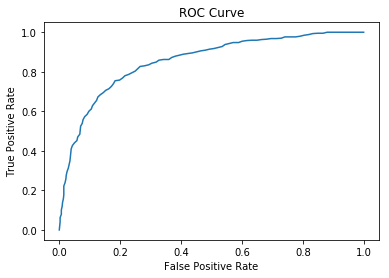

Area Under the Curve: 0.8530906702303563
Recall: 0.7149122807017544
Precision: 0.7375565610859729


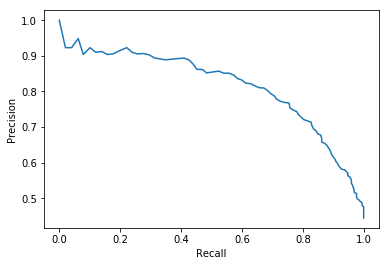

In [45]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

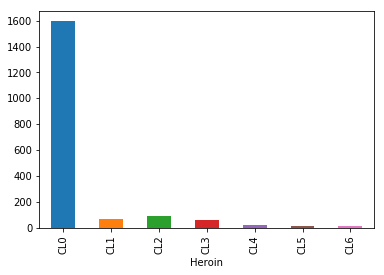

In [46]:
# Repeat for other target variables, in this case heroin.

drugdata.toPandas().groupby('Heroin').size().plot(kind='bar')

In [47]:
heroin_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Heroin')
heroin_dataset = heroin_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Heroin')

heroin_dataset.select('Heroin').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='label')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(heroin_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(heroin_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+--------+
|  Heroin|
+--------+
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
+--------+
only showing top 20 rows



In [48]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1278
Test Dataset Count: 595


True Positives: 16
True Negatives: 534
False Positives: 13
False Negatives: 32
Total: 595


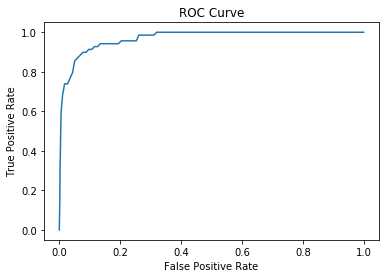

Area Under the Curve: 0.9694861006221456
Recall: 0.3333333333333333
Precision: 0.5517241379310345


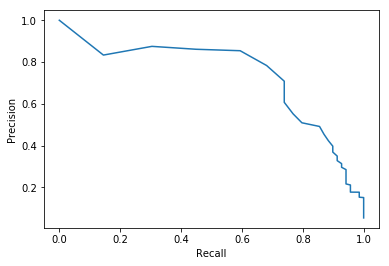

In [49]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

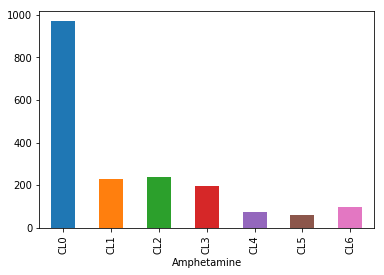

In [50]:
# Repeat for other target variables, in this case amphetamine.

drugdata.toPandas().groupby('Amphetamine').size().plot(kind='bar')

In [51]:
amphetamine_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Amphetamine')
amphetamine_dataset = amphetamine_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Amphetamine')

amphetamine_dataset.select('Amphetamine').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='label')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(amphetamine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(amphetamine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+-----------+
|Amphetamine|
+-----------+
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
|   Non-user|
+-----------+
only showing top 20 rows



In [52]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1343
Test Dataset Count: 530


True Positives: 65
True Negatives: 379
False Positives: 38
False Negatives: 48
Total: 530


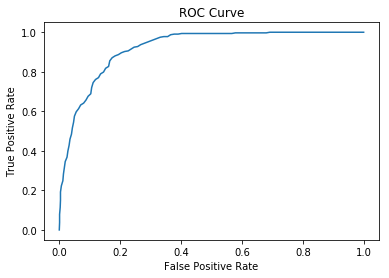

Area Under the Curve: 0.9200092038656232
Recall: 0.5752212389380531
Precision: 0.6310679611650486


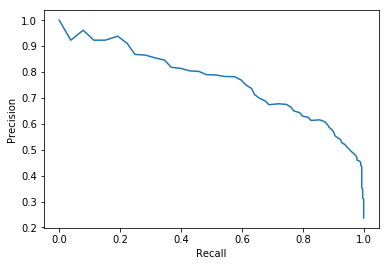

In [53]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

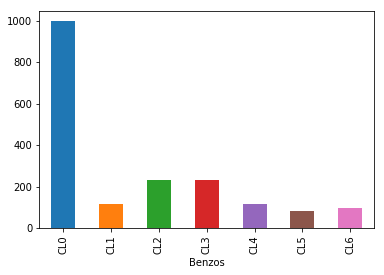

In [54]:
# Repeat for other target variables, in this case benzodiazepines.

drugdata.toPandas().groupby('Benzos').size().plot(kind='bar')

In [55]:
benzos_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Benzos')
benzos_dataset = benzos_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Benzos')

benzos_dataset.select('Benzos').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='label')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(benzos_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(benzos_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+--------+
|  Benzos|
+--------+
|Non-user|
|Non-user|
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
+--------+
only showing top 20 rows



In [56]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1312
Test Dataset Count: 561


True Positives: 87
True Negatives: 373
False Positives: 40
False Negatives: 61
Total: 561


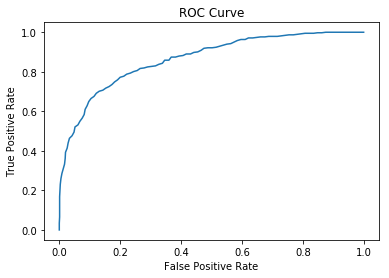

Area Under the Curve: 0.8649524292067781
Recall: 0.5878378378378378
Precision: 0.6850393700787402


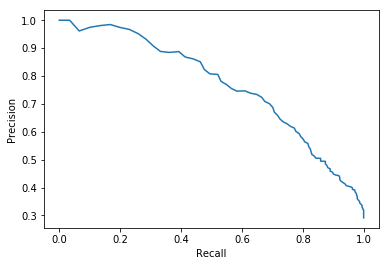

In [57]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

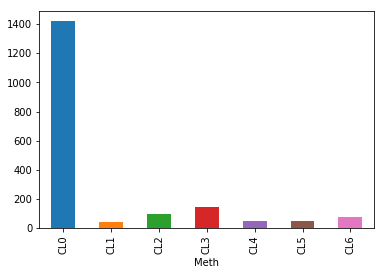

In [58]:
# Repeat for other target variables, in this case methamphetamine.

drugdata.toPandas().groupby('Meth').size().plot(kind='bar')

In [59]:
meth_dataset = drugdata.replace(['CL0','CL1','CL2'],'Non-user','Meth')
meth_dataset = meth_dataset.replace(['CL3','CL4','CL5','CL6'],'User','Meth')

meth_dataset.select('Meth').show()

age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='label')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(meth_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(meth_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

+--------+
|    Meth|
+--------+
|Non-user|
|    User|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|Non-user|
|    User|
+--------+
only showing top 20 rows



In [60]:
# Split the data, train the model and classify the test set.

train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)
results = lr_model.transform(test_data)

Training Dataset Count: 1330
Test Dataset Count: 543


True Positives: 34
True Negatives: 429
False Positives: 20
False Negatives: 60
Total: 543


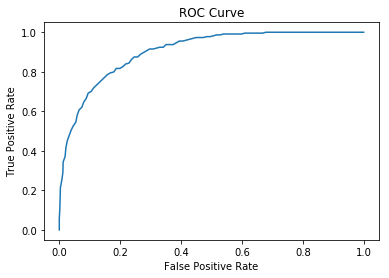

Area Under the Curve: 0.9037030160165331
Recall: 0.3617021276595745
Precision: 0.6296296296296297


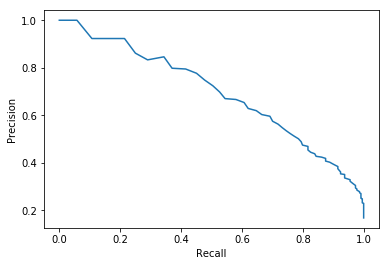

In [61]:
# Visualize and evaluate the results. 
# Code adapted from https://gist.github.com/ispmarin/05feacd8be5e2901cf2b35453a148060 and tutorial examples.

# Generate a confusion matrix.
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Plot the ROC.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [62]:
# On this iteration I will use the Decision Tree algorithm.

# I'll use cocaine as my target feature for this iteration, so its output is given the label 'label'.
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='label')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                      'cannabisVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec','Neuroticism',
                                      'Extraversion','Openness to experience','Agreeableness','Conscientiousness',
                                      'Impulsiveness','Sensation seeking'], outputCol="features")
pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(cocaine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(cocaine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [63]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]
# summary only
print(treeModel)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.162791 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_494786b9a7089da9523f) of depth 5 with 53 nodes


In [64]:
tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

True Positives: 81
True Negatives: 387
False Positives: 50
False Negatives: 41
Total: 559
Recall: 0.6639344262295082
Precision: 0.6183206106870229


In [65]:
# I go through the process of preparing the dataset again, this time using cannabis as my target variable.
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='label')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                      'cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec','Neuroticism',
                                      'Extraversion','Openness to experience','Agreeableness','Conscientiousness',
                                      'Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(cannabis_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(cannabis_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [66]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.182482 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_47268806353cb4458e2e) of depth 5 with 61 nodes
True Positives: 192
True Negatives: 256
False Positives: 51
False Negatives: 49
Total: 548
Recall: 0.7966804979253111
Precision: 0.7901234567901234


In [67]:
# I go through the process of preparing the dataset again, this time using nicotine as my target variable.
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='label')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, assembler])

pipeline_model = pipeline.fit(nicotine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(nicotine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [68]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.242026 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4d999132a5ddce505137) of depth 5 with 57 nodes
True Positives: 151
True Negatives: 253
False Positives: 55
False Negatives: 74
Total: 533
Recall: 0.6711111111111111
Precision: 0.7330097087378641


In [69]:
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='label')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(heroin_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(heroin_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [70]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.0818505 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_438e9ae3e96a1c8535ca) of depth 5 with 37 nodes
True Positives: 3
True Negatives: 513
False Positives: 16
False Negatives: 30
Total: 562
Recall: 0.09090909090909091
Precision: 0.15789473684210525


In [71]:
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='label')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(amphetamine_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(amphetamine_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [72]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       1.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.206522 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4bb1a5f0fe2bdf94b4b8) of depth 5 with 51 nodes
True Positives: 42
True Negatives: 396
False Positives: 34
False Negatives: 80
Total: 552
Recall: 0.3442622950819672
Precision: 0.5526315789473685


In [73]:
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='label')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='methIndex')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
meth_encoder = OneHotEncoder(inputCol='methIndex',outputCol='methVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','methVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, meth_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(benzos_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(benzos_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [74]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,25,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.204225 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4b98b151054bf42724a6) of depth 5 with 55 nodes
True Positives: 88
True Negatives: 364
False Positives: 44
False Negatives: 72
Total: 568
Recall: 0.55
Precision: 0.6666666666666666


In [75]:
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
education_indexer = StringIndexer(inputCol='Education',outputCol='educationIndex')
alcohol_indexer = StringIndexer(inputCol='Alcohol',outputCol='alcoholIndex')
amphetamine_indexer = StringIndexer(inputCol='Amphetamine',outputCol='amphetamineIndex')
benzos_indexer = StringIndexer(inputCol='Benzos',outputCol='benzosIndex')
cannabis_indexer = StringIndexer(inputCol='Cannabis',outputCol='cannabisIndex')
cocaine_indexer = StringIndexer(inputCol='Cocaine',outputCol='cocaineIndex')
crack_indexer = StringIndexer(inputCol='Crack',outputCol='crackIndex')
ecstacy_indexer = StringIndexer(inputCol='Ecstacy',outputCol='ecstacyIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='heroinIndex')
meth_indexer = StringIndexer(inputCol='Meth',outputCol='label')
nicotine_indexer = StringIndexer(inputCol='Nicotine',outputCol='nicotineIndex')


age_encoder = OneHotEncoder(inputCol='ageIndex',outputCol='ageVec')
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
alcohol_encoder = OneHotEncoder(inputCol='alcoholIndex',outputCol='alcoholVec')
amphetamine_encoder = OneHotEncoder(inputCol='amphetamineIndex',outputCol='amphetamineVec')
benzos_encoder = OneHotEncoder(inputCol='benzosIndex',outputCol='benzosVec')
cannabis_encoder = OneHotEncoder(inputCol='cannabisIndex',outputCol='cannabisVec')
cocaine_encoder = OneHotEncoder(inputCol='cocaineIndex',outputCol='cocaineVec')
crack_encoder = OneHotEncoder(inputCol='crackIndex',outputCol='crackVec')
ecstacy_encoder = OneHotEncoder(inputCol='ecstacyIndex',outputCol='ecstacyVec')
heroin_encoder = OneHotEncoder(inputCol='heroinIndex',outputCol='heroinVec')
nicotine_encoder = OneHotEncoder(inputCol='nicotineIndex',outputCol='nicotineVec')

assembler = VectorAssembler(inputCols=['ageVec','genderVec','educationVec','alcoholVec','amphetamineVec','benzosVec',
                                       'cannabisVec','cocaineVec','crackVec','ecstacyVec','heroinVec','nicotineVec',
                                       'Neuroticism','Extraversion','Openness to experience','Agreeableness',
                                       'Conscientiousness','Impulsiveness','Sensation seeking'], outputCol="features")

pipeline = Pipeline(stages=[age_indexer, gender_indexer, education_indexer, alcohol_indexer, amphetamine_indexer,
                            benzos_indexer, cannabis_indexer, cocaine_indexer, crack_indexer, ecstacy_indexer,
                            heroin_indexer, meth_indexer, nicotine_indexer, age_encoder, gender_encoder, education_encoder,
                            alcohol_encoder, amphetamine_encoder, benzos_encoder, cannabis_encoder, cocaine_encoder, crack_encoder,
                            ecstacy_encoder, heroin_encoder, nicotine_encoder, assembler])

pipeline_model = pipeline.fit(meth_dataset)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(meth_dataset)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [76]:
# Run decision tree and evaluate the model.
# Code adapted from examples in the Spark documentation.

(trainingData, testData) = pipe_df.randomSplit([0.7, 0.3])

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

pipeline = Pipeline(stages=[dt])

model = pipeline.fit(trainingData)

results = model.transform(testData)

results.select("prediction", "label", "features").show(5)

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(results)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[0]

# summary only
print(treeModel)

tp = results[(results.label == 1.0) & (results.prediction == 1.0)].count()
tn = results[(results.label == 0.0) & (results.prediction == 0.0)].count()
fp = results[(results.label == 0.0) & (results.prediction == 1.0)].count()
fn = results[(results.label == 1.0) & (results.prediction == 0.0)].count()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Total: " + str(results.count()))

# Show precision & recall.
r = float(tp)/(tp + fn)
print("Recall:", r)

p = float(tp) / (tp + fp)
print("Precision:", p)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
|       0.0|  0.0|(77,[0,6,8,16,22,...|
+----------+-----+--------------------+
only showing top 5 rows

Test Error = 0.153409 
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4d8ebf27bf8f784441c7) of depth 5 with 49 nodes
True Positives: 47
True Negatives: 400
False Positives: 23
False Negatives: 58
Total: 528
Recall: 0.44761904761904764
Precision: 0.6714285714285714


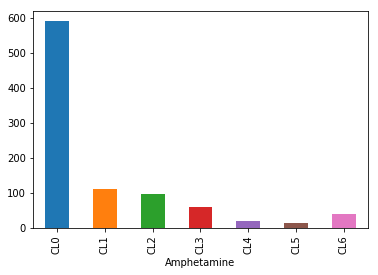

In [77]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Amphetamine').size().plot(kind='bar')

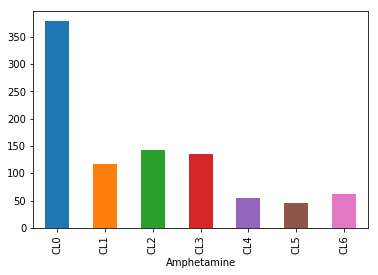

In [78]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Amphetamine').size().plot(kind='bar')

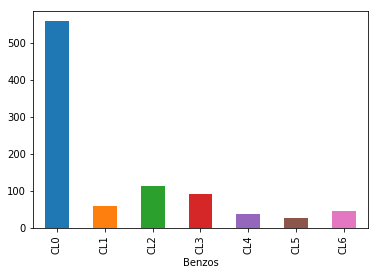

In [79]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Benzos').size().plot(kind='bar')

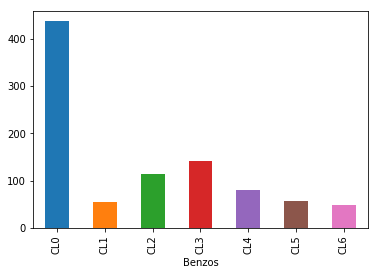

In [80]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Benzos').size().plot(kind='bar')

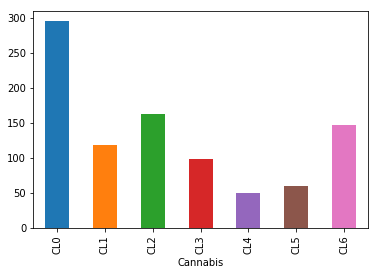

In [81]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Cannabis').size().plot(kind='bar')

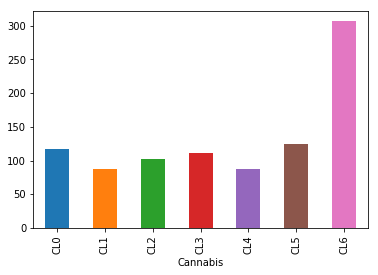

In [82]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Cannabis').size().plot(kind='bar')

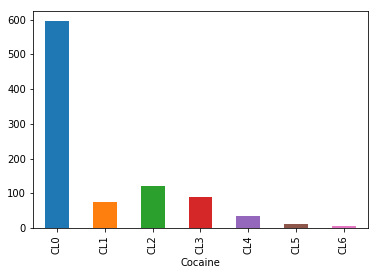

In [83]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Cocaine').size().plot(kind='bar')

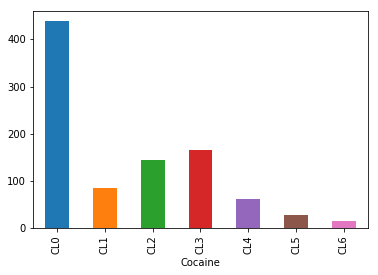

In [84]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Cocaine').size().plot(kind='bar')

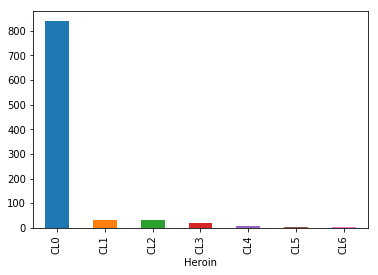

In [85]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Heroin').size().plot(kind='bar')

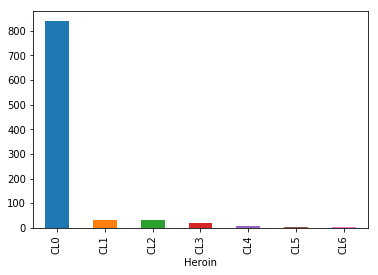

In [86]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Heroin').size().plot(kind='bar')

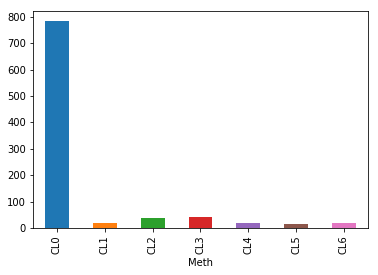

In [87]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Meth').size().plot(kind='bar')

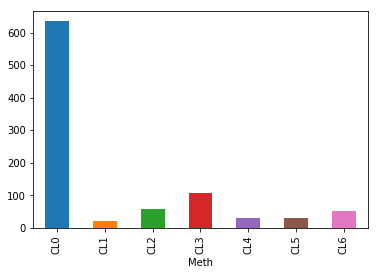

In [88]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Meth').size().plot(kind='bar')

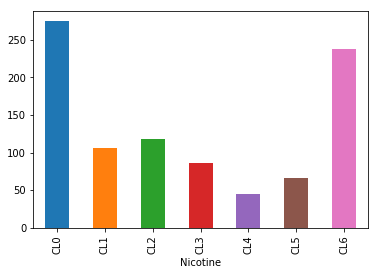

In [89]:
drugdata.filter("Gender = 'Female'").toPandas().groupby('Nicotine').size().plot(kind='bar')

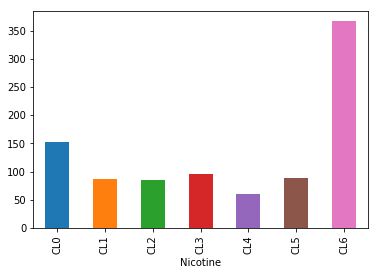

In [90]:
drugdata.filter("Gender = 'Male'").toPandas().groupby('Nicotine').size().plot(kind='bar')

In [91]:
# Personality data by gender.
gender_stats = drugdata.groupBy('Gender').mean()
gender_stats = gender_stats.select('Gender',
                                   format_number('avg(Neuroticism)',2),
                                   format_number('avg(Extraversion)',2),
                                   format_number('avg(Openness to experience)',2),
                                   format_number('avg(Agreeableness)',2),
                                   format_number('avg(Conscientiousness)',2),
                                   format_number('avg(Impulsiveness)',2),
                                   format_number('avg(Sensation seeking)',2))
gender_stats = gender_stats.select('Gender',
                                   col('format_number(avg(Neuroticism), 2)').alias('Neuroticism'),
                                   col('format_number(avg(Extraversion), 2)').alias('Extraversion'),
                                   col('format_number(avg(Openness to experience), 2)').alias('Openness...'),
                                   col('format_number(avg(Agreeableness), 2)').alias('Agreeableness'),
                                   col('format_number(avg(Conscientiousness), 2)').alias('Conscientiousness'),
                                   col('format_number(avg(Impulsiveness), 2)').alias('Impulsiveness'),
                                   col('format_number(avg(Sensation seeking), 2)').alias('Sensation seeking'))
gender_stats.orderBy('Gender').show()

+-------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
| Gender|Neuroticism|Extraversion|Openness...|Agreeableness|Conscientiousness|Impulsiveness|Sensation seeking|
+-------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+
| Female|      36.53|       39.99|      44.83|        44.29|            42.72|        -0.16|            -0.25|
|   Male|      35.30|       39.15|      46.66|        41.45|            40.17|         0.17|             0.23|
|Unknown|      32.50|       37.00|      46.50|        44.00|            38.00|        -0.80|            -0.53|
+-------+-----------+------------+-----------+-------------+-----------------+-------------+-----------------+

